<img width="800px" src="../fidle/img/00-Fidle-header-01.svg"></img>

# <!-- TITLE --> [GRAD1] - Linear regression with gradient descent
<!-- DESC --> Low level implementation of a solution by gradient descent. Basic and stochastic approach.
<!-- AUTHOR : Jean-Luc Parouty (CNRS/SIMaP) -->


## Objectives :
 - To illustrate the iterative approach of a gradient descent

## What we're going to do :

Equation : $ Y = X.\Theta + N$  
Where N is a noise vector
and $\Theta = (a,b)$ a vector as y = a.x + b

We will calculate a loss function and its gradient.  
We will descend this gradient in order to find a minimum value of our loss function.

$
\triangledown_\theta MSE(\Theta)=\begin{bmatrix}
\frac{\partial}{\partial \theta_0}MSE(\Theta)\\
\frac{\partial}{\partial \theta_1}MSE(\Theta)\\
\vdots\\
\frac{\partial}{\partial \theta_n}MSE(\Theta)
\end{bmatrix}=\frac2m X^T\cdot(X\cdot\Theta-Y)
$  

and :  

$\Theta \leftarrow \Theta - \eta \cdot \triangledown_\theta MSE(\Theta)$

where $\eta$ is the learning rate

## Step 1 - Import and init


In [1]:
import numpy as np
import sys

sys.path.append('..')
import fidle.pwk as pwk

from modules.RegressionCooker import RegressionCooker 

# ---- Init Fidle stuffs
#
datasets_dir = pwk.init('GRAD1')

# ---- Instanciate a Regression Cooker
#
cooker = RegressionCooker(pwk)

<br>**FIDLE 2020 - Practical Work Module**

Version              : 2.0.7
Notebook id          : GRAD1
Run time             : Tuesday 26 January 2021, 19:54:22
TensorFlow version   : 2.2.0
Keras version        : 2.3.0-tf
Datasets dir         : /home/pjluc/datasets/fidle
Run dir              : ./run
Update keras cache   : False
Save figs            : True
Path figs            : ./run/figs


<br>**FIDLE 2020 - Regression Cooker**

Version      : 0.1
Run time     : Tuesday 26 January 2021, 19:54:22


## Step 2 - Get a dataset

### Dataset :

X shape : (1000000, 1)  Y shape : (1000000, 1)  plot : 1000 points


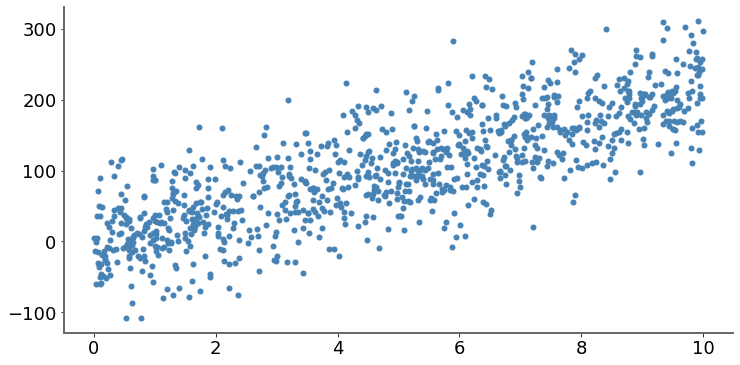

X                :      mean=   5.000  std=   2.887    min=   0.000    max=  10.000
Y                :      mean= 104.985  std=  76.723    min=-200.799    max= 412.544


In [2]:
X,Y = cooker.get_dataset(1000000)

cooker.plot_dataset(X,Y)

## Step 3 : Data normalization

In [3]:
X_norm     = ( X - X.mean() ) / X.std()
Y_norm     = ( Y - Y.mean() ) / Y.std()

cooker.vector_infos('X origine',X)
cooker.vector_infos('X normalized',X_norm)

X origine        :      mean=   5.000  std=   2.887    min=   0.000    max=  10.000
X normalized     :      mean=   0.000  std=   1.000    min=  -1.732    max=   1.732


## Step 4 - Basic descent

### Basic gradient descent :

**With :**  

with :
    epochs = 200
    eta    = 0.01


**epochs :**  

    #i   Loss       Gradient         Theta
    0  +16.885   -7.971  -1.581   -3.906  +0.016


   20   +7.733   -5.322  -1.056   -2.608  +0.273


   40   +3.655   -3.553  -0.705   -1.741  +0.445


   60   +1.837   -2.372  -0.470   -1.162  +0.560


   80   +1.026   -1.583  -0.314   -0.776  +0.637


  100   +0.665   -1.057  -0.210   -0.518  +0.688


  120   +0.504   -0.706  -0.140   -0.346  +0.722


  140   +0.433   -0.471  -0.093   -0.231  +0.745


  160   +0.401   -0.315  -0.062   -0.154  +0.760


  180   +0.386   -0.210  -0.042   -0.103  +0.770


  200   +0.380   -0.140  -0.028   -0.069  +0.777


<br>**Visualization :**

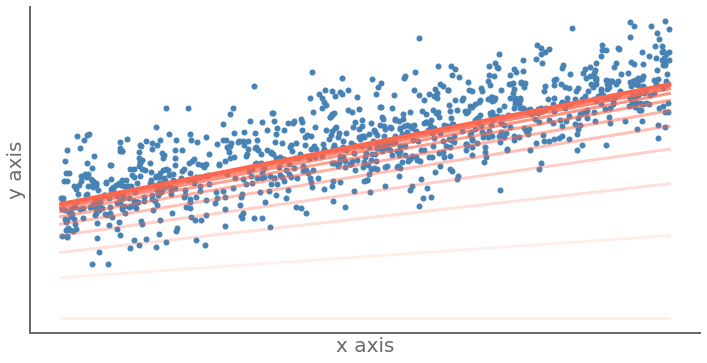

<br>**Loss :**

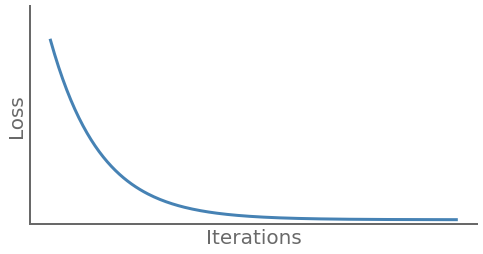

In [4]:
theta = cooker.basic_descent(X_norm, Y_norm, epochs=200, eta=0.01)

## Step 5 - Minibatch descent

### Mini batch gradient descent :

**With :**  

with :
    epochs     = 10
    batchs     = 20
    batch size = 10
    eta        = 0.01


**epochs :**  

    #i   Loss       Gradient         Theta
    0   +0.276   +1.519  +3.117   -0.093  +0.613
    1   +0.392   +1.700  -2.631   -0.005  +0.768
    2   +0.450   -5.149  -2.335   +0.029  +0.802
    3   +0.275   +1.166  -2.353   +0.056  +0.801
    4   +0.395   -1.699  +2.111   +0.049  +0.789
    5   +0.257   -3.273  +5.362   +0.031  +0.757
    6   +0.604   +6.659  -2.308   +0.002  +0.767
    7   +0.243   +3.230  +0.874   -0.022  +0.765
    8   +0.574   +9.069  -6.591   -0.029  +0.790
    9   +0.521   +4.111  -2.845   -0.024  +0.788


<br>**Visualization :**

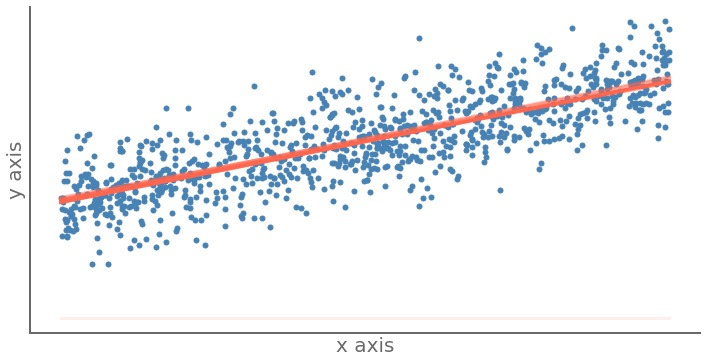

<br>**Loss :**

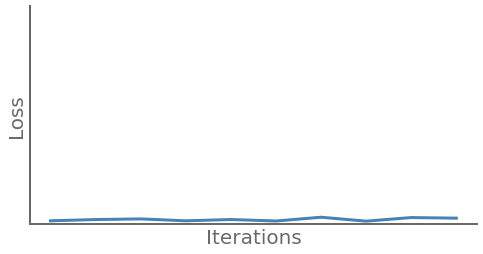

In [5]:
theta = cooker.minibatch_descent(X_norm, Y_norm, epochs=10, batchs=20, batch_size=10, eta=0.01)

In [6]:
pwk.end()

End time is : Tuesday 26 January 2021, 19:54:27
Duration is : 00:00:04 437ms
This notebook ends here


---
<img width="80px" src="../fidle/img/00-Fidle-logo-01.svg"></img>